<a href="https://colab.research.google.com/github/ymuto0302/RW2025/blob/main/k_nearest_neighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# k-Nearest Neighbors 分類器

In [ ]:
# 準備：mglearn パッケージのインストール
!pip install mglearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 5.6 MB/s eta 0:00:00


accuracy: 0.875


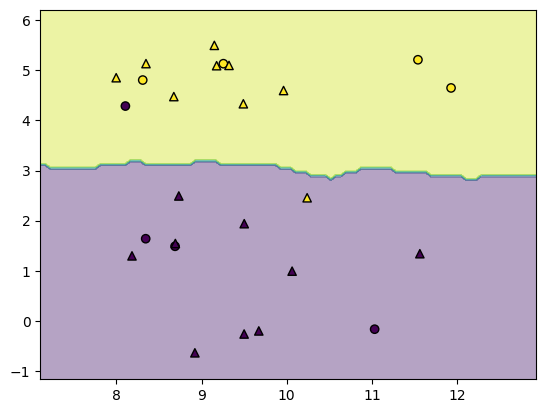

In [ ]:
'''
k-近傍法
(注意) forge データセットを利用するため，予め mglearn パッケージを
インストールすること。Google Colab の場合，以下のコマンドによりインストールできる。
!pip install mglearn
'''
import numpy as np
from mglearn.datasets import make_forge
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# データの読み込み
X, y = make_forge()

# 学習データとテストデータに分割 (学習:テスト=7:3)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    stratify=y)

# モデルの構築
model = KNeighborsClassifier(n_neighbors=3)

# モデルの学習
model.fit(X_train, y_train)

# 予測
predictions = model.predict(X_test)

# 評価
print("accuracy:", np.mean(predictions == y_test))

# 決定境界の描画
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt
fig, ax = plt.subplots() # ax を取得するため subplots を使う
DecisionBoundaryDisplay.from_estimator(model, X_test,
                                       response_method="predict",
                                       alpha=0.4, ax=ax) # 決定境界の描画
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='black') # テストサンプルを描画
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='black', marker="^") # 学習サンプルを描画

---
## step-by-step によるコードの解説

### ライブラリのインポート
冒頭の import 文は，この後の処理に必要なモジュールの読み込みを行う機能を提供する。

In [ ]:
import numpy as np
from mglearn.datasets import make_forge
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

- `import numpy as np` : numpy を np という名前で読み込む。終盤の平均の計算に用いる。
- `from mglearn.datasets import make_forge` : forge データセットを読み込むための import 文
- `from sklearn.neighbors import KNeighborsClassifier` : 識別器である k-Nearest Neighbor 分類器を利用するための import 文
- `from sklearn.model_selection import train_test_split` : データセットを学習用・テスト用に分割する train_test_split を読み込むための import 文

### データ生成 ＆ 学習データとテストデータへの分割

In [ ]:
# データの読み込み
X, y = make_forge()

# 学習データとテストデータに分割 (学習:テスト=7:3)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    stratify=y)

- `make_forge()` を用いて forge データセットを生成する。
変数 `X` には特徴量が，変数 `y` にはラベルが格納されている。
- `train_test_split(X, y, test_size=0.3, stratify=y)` : データセットを学習用データとテスト用データに分割するための関数である。第１引数の `X` は特徴量，第２引数 `y` はラベルである。その他の引数の意味は以下のとおり：
    - `test_size=0.3` : 学習用データとテスト用データの比率を 7:3 として分割する。
    - `stratify=y` : ラベル毎の偏りが生じないよう，変数 `y` に含まれる値の分布に応じた分割を行う。


### モデルの定義・学習・予測
k-NN 分類器の定義(インスタンス化)，学習，予測を行う，本コードの中心部分である。

In [ ]:
# モデルの構築
model = KNeighborsClassifier(n_neighbors=3)

# モデルの学習
model.fit(X_train, y_train)

# 予測
predictions = model.predict(X_test)

- `model = KNeighborsClassifier(n_neighbors=3)` : k-NN分類器を定義(インスタンス化)する。ここでは近傍数を 3個とすべく，`n_neighbors=3` とパラメータ設定している。
- `model.fit()` : scikit-learn では，モデルの学習に `fit()` 関数を用いる。与えるパラメータは学習データの特徴量とラベルである。
- `mode.predict()` : テストデータの特徴値を渡し，各特徴がいずれのクラスに属するかを予測させる。scikit-learn では予測（または分類）に `predict()` 関数を用いる。`predict()` 関数の返し値は，予測値の格納された配列である。

### モデルの評価
変数 `predictions` に予測されたラベル値が収められている。これを正解ラベル `y_test` と比較し，正解した値の割合を求める。

In [ ]:
# 評価
print("accuracy:", np.mean(predictions == y_test))

### (おまけ) 決定境界の描画
scikit-learn には決定境界を可視化するクラスとして `DecisionBoundaryDisplay` が存在する。このコードの解説は，機械学習やデータサイエンスの学習の本質から外れるため，その解説を省略する。

In [ ]:
# 決定境界の描画
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt
fig, ax = plt.subplots() # ax を取得するため subplots を使う
DecisionBoundaryDisplay.from_estimator(model, X_test,
                                       response_method="predict",
                                       alpha=0.4, ax=ax) # 決定境界の描画
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='black') # テストサンプルを描画
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='black', marker="^") # 学習サンプルを描画